In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_rides = pd.read_csv('cab_rides.csv')
df_weather = pd.read_csv('weather.csv')

In [3]:
df_rides['date'] = pd.to_datetime(df_rides['time_stamp']/ 1000, unit = 's')
df_weather['date'] = pd.to_datetime(df_weather['time_stamp'], unit = 's')

In [4]:
df_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050


In [5]:
df_rides['merged_date'] = df_rides['source'].astype('str') + ' - ' + df_rides['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + df_rides['date'].dt.hour.astype('str')
df_weather['merged_date'] = df_weather['location'].astype('str') + ' - ' + df_weather['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + df_weather['date'].dt.hour.astype('str')

In [6]:
df_weather.index = df_weather['merged_date']

In [7]:
df_joined = df_rides.join(df_weather, on = ['merged_date'], rsuffix ='_w')

In [8]:
df_joined.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_w,merged_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,NaN,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,35.08,Haymarket Square,0.00,1013.71,NaN,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4


In [9]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268639 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1268639 non-null  float64       
 1   cab_type          1268639 non-null  object        
 2   time_stamp        1268639 non-null  int64         
 3   destination       1268639 non-null  object        
 4   source            1268639 non-null  object        
 5   price             1167730 non-null  float64       
 6   surge_multiplier  1268639 non-null  float64       
 7   id                1268639 non-null  object        
 8   product_id        1268639 non-null  object        
 9   name              1268639 non-null  object        
 10  date              1268639 non-null  datetime64[ns]
 11  merged_date       1268639 non-null  object        
 12  temp              1265675 non-null  float64       
 13  location          1265675 non-null  object 

In [10]:
id_group = pd.DataFrame(df_joined.groupby('id')['temp','clouds', 'pressure', 'rain', 'humidity', 'wind'].mean())
df_rides_weather = df_rides.join(id_group, on = ['id'])

<ipython-input-10-f8fb8fbd2d98>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  id_group = pd.DataFrame(df_joined.groupby('id')['temp','clouds', 'pressure', 'rain', 'humidity', 'wind'].mean())


In [11]:
df_rides_weather.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,merged_date,temp,clouds,pressure,rain,humidity,wind
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,0.41,1023.64,NaN,0.76,2.51
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,0.41,1023.64,NaN,0.76,2.51
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,0.41,1023.64,NaN,0.76,2.51
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,0.41,1023.64,NaN,0.76,2.51
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-01 23:53:05.533999919,West End - 2018-12-01 - 23,36.69,0.41,1023.64,NaN,0.76,2.51


In [12]:
# Creating the columns for Month, Hour and Weekdays 
df_rides_weather['Month'] = df_rides_weather['date'].dt.month
df_rides_weather['Hour'] = df_rides_weather['date'].dt.hour
df_rides_weather['Day'] =  df_rides_weather['date'].dt.strftime('%A')

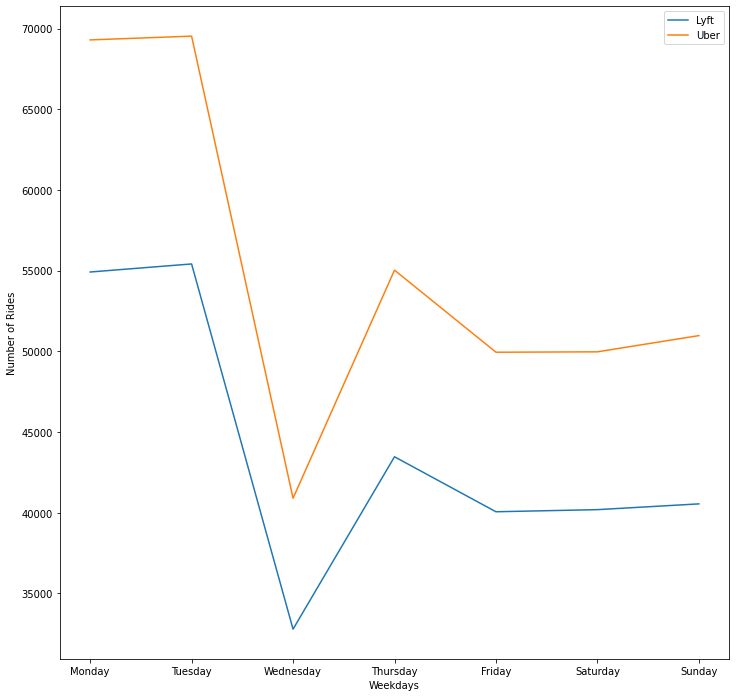

In [13]:
uber_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['Day'].value_counts()
uber_day_count = uber_day_count.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'])
lyft_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['Day'].value_counts()
lyft_day_count = lyft_day_count.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'])

fig , ax = plt.subplots(figsize = (12,12))

ax.plot(lyft_day_count.index, lyft_day_count, label = 'Lyft')
ax.plot(uber_day_count.index, uber_day_count, label = 'Uber')

ax.set(ylabel = 'Number of Rides', xlabel = 'Weekdays')
ax.legend()
plt.show()

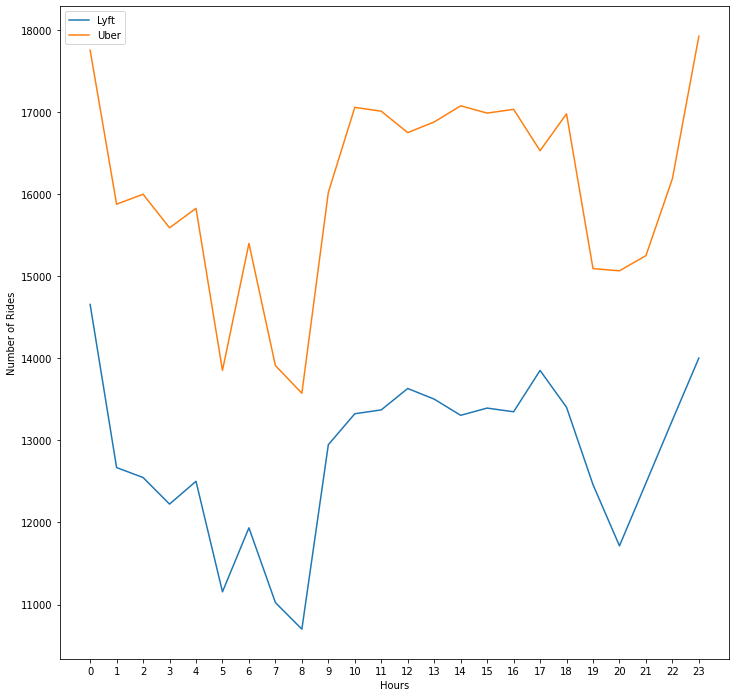

In [14]:
# The ride distribution in one day 
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('Hour').Hour.count(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Number of Rides')
plt.xticks(range(0,24,1))
plt.show()

green - Lyft
orange - Uber


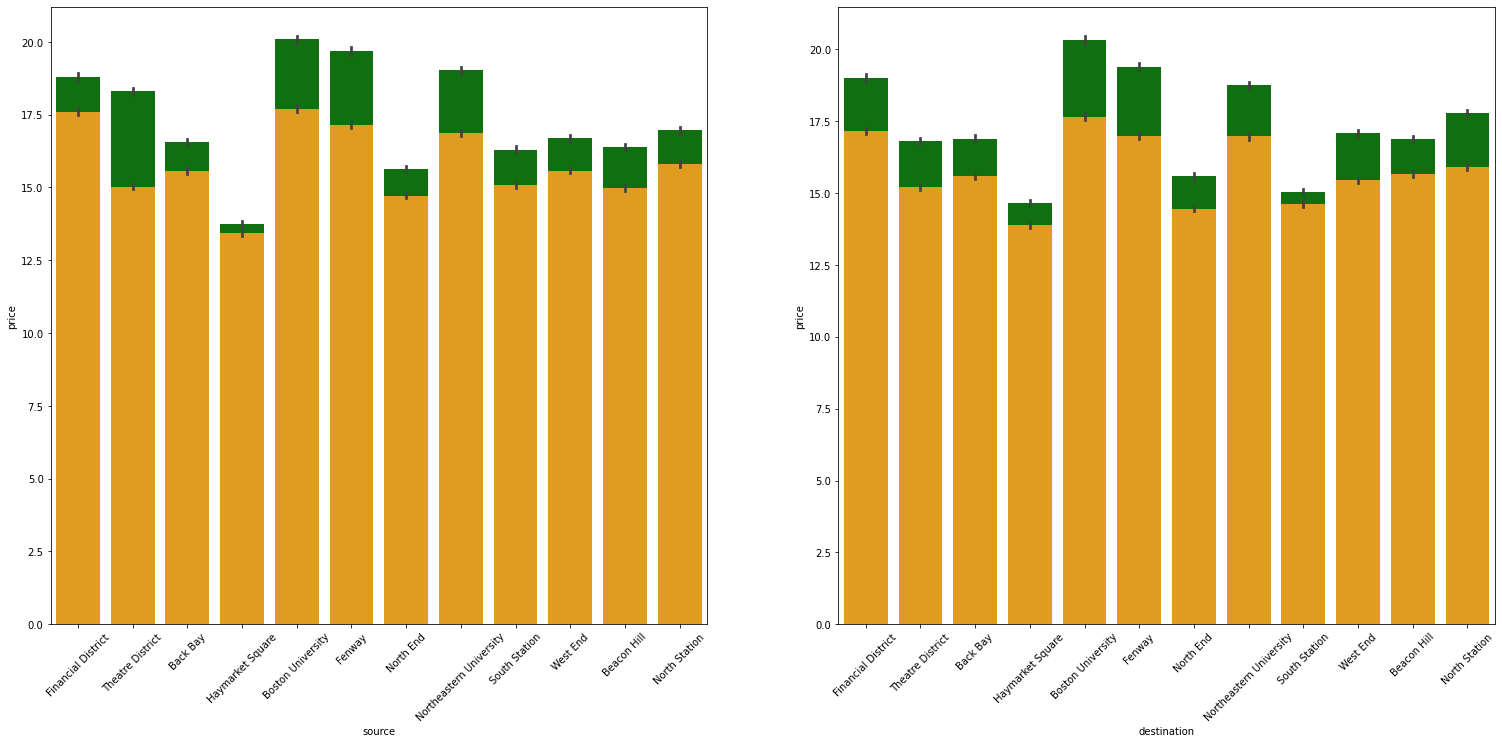

In [25]:
order = ['Financial District', 'Theatre District', 'Back Bay', 'Haymarket Square', 'Boston University', 'Fenway', 'North End', 'Northeastern University', 'South Station', 'West End', 'Beacon Hill', 'North Station']

print('green - Lyft\norange - Uber')
f = plt.figure(figsize = (40, 25))
ax = f.add_subplot(2,3,1)
plt.xticks(rotation=45)
sns.barplot(x='source', y='price', data=df_rides_weather[df_rides_weather['cab_type']=='Lyft'], ax=ax, order = order, color = 'green')
sns.barplot(x='source', y='price', data=df_rides_weather[df_rides_weather['cab_type']=='Uber'], ax=ax, order = order, color = 'orange')
ax = f.add_subplot(2,3,2)
plt.xticks(rotation=45)
sns.barplot(x='destination', y='price', data=df_rides_weather[df_rides_weather['cab_type']=='Lyft'], ax=ax, order = order, color = 'green')
sns.barplot(x='destination', y='price', data=df_rides_weather[df_rides_weather['cab_type']=='Uber'], ax=ax, order = order, color = 'orange')
plt.show()

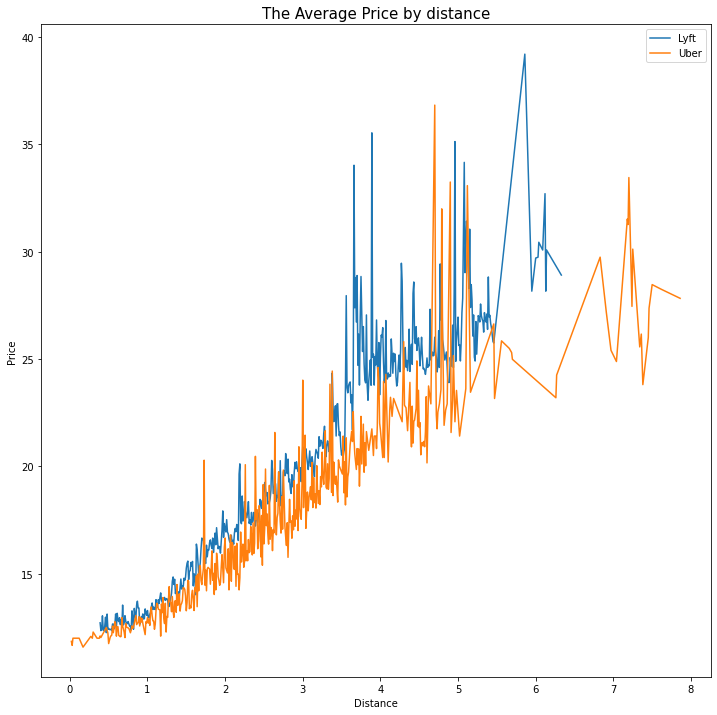

In [26]:
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('distance')['price'].mean(), label = 'Uber')

ax.set_title('The Average Price by distance', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()

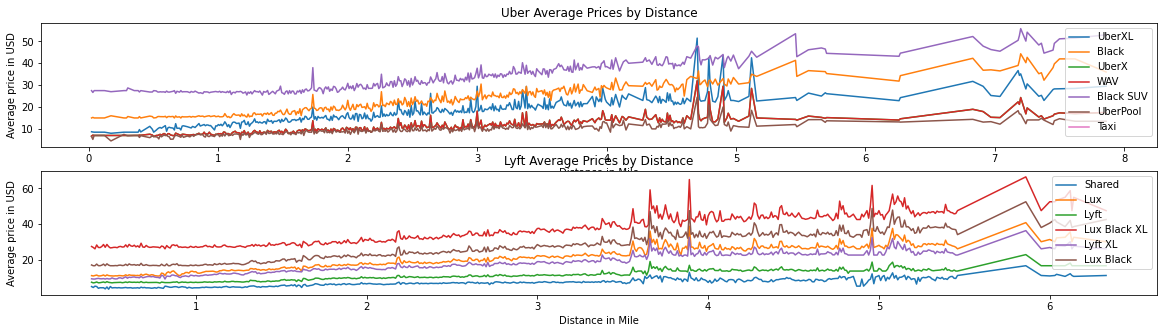

In [27]:
fig, ax = plt.subplots(2, 1, figsize = (20,5))
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['name'].unique()):
    ax[0].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['name'].unique()):
    ax[1].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()
plt.show()

<AxesSubplot:>

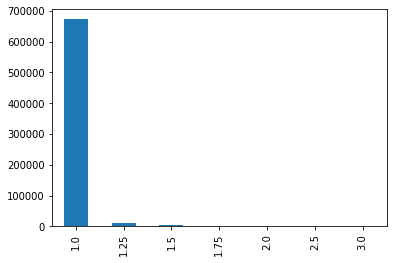

In [18]:
x = df_rides_weather['surge_multiplier'].value_counts()
x.plot.bar(x = 'multiplier', y = 'Number of times')

<AxesSubplot:>

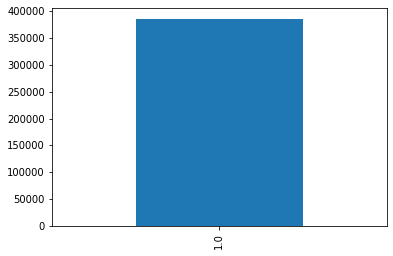

In [19]:
x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['surge_multiplier'].value_counts()
x.plot.bar(x = 'multipler uber', y = 'Number of rides')

<AxesSubplot:>

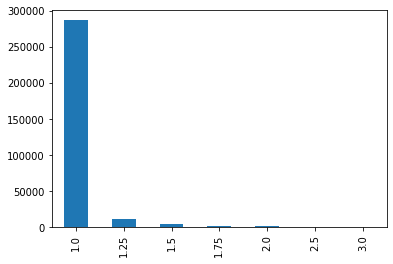

In [20]:
x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['surge_multiplier'].value_counts()
x.plot.bar(x = 'multipler lyft', y = 'Number of rides')

In [21]:
df_rides_weather['price/distance'] = (df_rides_weather['price'] / df_rides_weather['distance'])

high_rates = df_rides_weather[df_rides_weather['price/distance'] > 80]
high_rates['cab_type'].value_counts()

Uber    414
Lyft     39
Name: cab_type, dtype: int64

In [22]:
high_rates[high_rates['cab_type'] == 'Uber']['distance'].value_counts()

0.03    204
0.04     84
0.02     60
0.12     18
0.17     10
0.29      9
0.30      9
0.39      7
0.27      5
0.55      2
0.49      2
0.56      2
0.62      1
0.72      1
Name: distance, dtype: int64

source


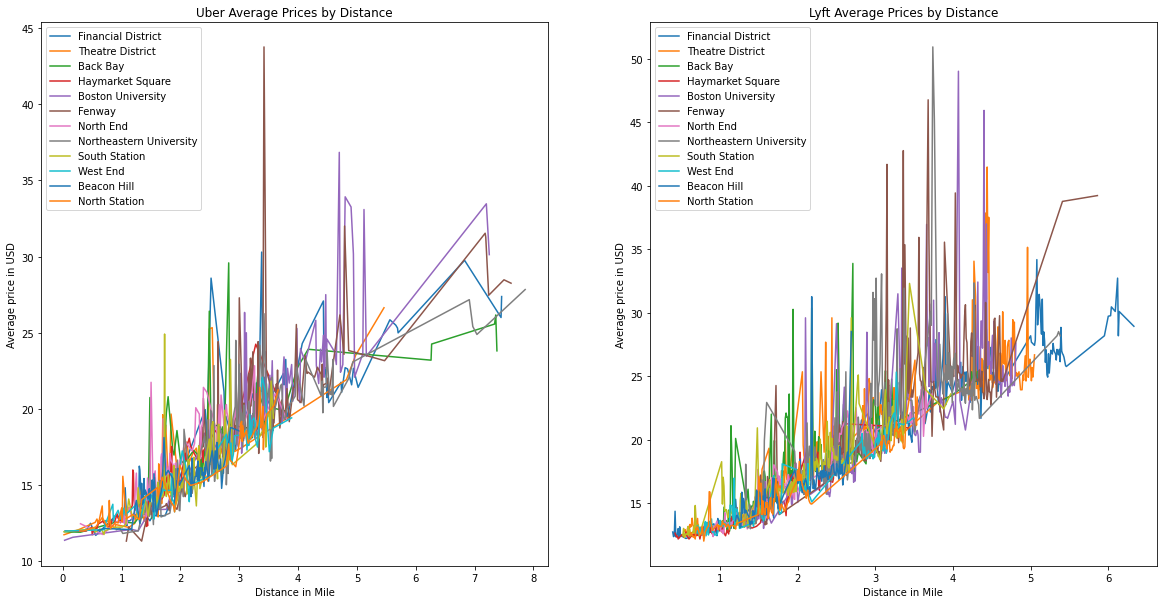

In [28]:
order = ['Financial District', 'Theatre District', 'Back Bay', 'Haymarket Square', 'Boston University', 'Fenway', 'North End', 'Northeastern University', 'South Station', 'West End', 'Beacon Hill', 'North Station']

print('source')
fig, ax = plt.subplots(1, 2, figsize = (20,10))
df_uber = df_rides_weather[df_rides_weather['cab_type'] == 'Uber']
for i, col in enumerate(order):
    x = df_uber[df_uber['source'] == col].groupby('distance').price.mean().index
    y = df_uber[df_uber['source'] == col].groupby('distance').price.mean()
    ax[0].plot(x, y, label = col)

ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()

df_lyft = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']
for i, col in enumerate(order):
    x = df_lyft[df_lyft['source'] == col].groupby('distance').price.mean().index
    y = df_lyft[df_lyft['source'] == col].groupby('distance').price.mean()
    ax[1].plot(x, y, label = col)
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()
plt.show()

destination


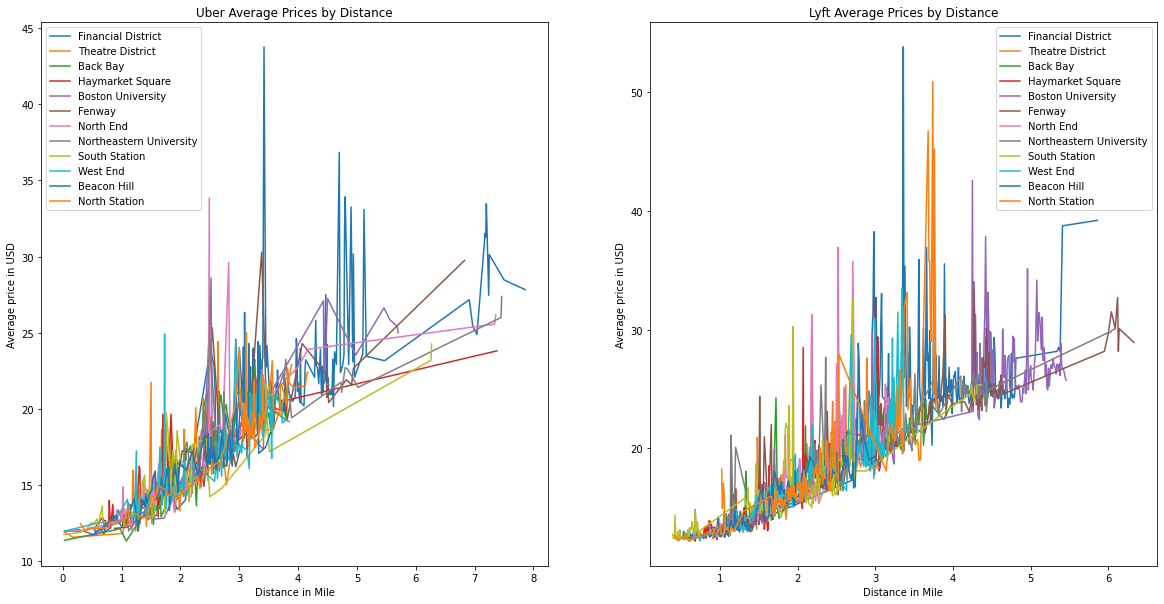

In [29]:
order = ['Financial District', 'Theatre District', 'Back Bay', 'Haymarket Square', 'Boston University', 'Fenway', 'North End', 'Northeastern University', 'South Station', 'West End', 'Beacon Hill', 'North Station']

print('destination')
fig, ax = plt.subplots(1, 2, figsize = (20,10))
df_uber = df_rides_weather[df_rides_weather['cab_type'] == 'Uber']
for i, col in enumerate(order):
    x = df_uber[df_uber['destination'] == col].groupby('distance').price.mean().index
    y = df_uber[df_uber['destination'] == col].groupby('distance').price.mean()
    ax[0].plot(x, y, label = col)

ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()

df_lyft = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']
for i, col in enumerate(order):
    x = df_lyft[df_lyft['destination'] == col].groupby('distance').price.mean().index
    y = df_lyft[df_lyft['destination'] == col].groupby('distance').price.mean()
    ax[1].plot(x, y, label = col)
    
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()
plt.show()